<a href="https://colab.research.google.com/github/hyungni/hyungni.github.io/blob/main/1_8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%84%B1%EB%8A%A5_%EC%B5%9C%EC%A0%81%ED%99%94_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Hyperparameter Optimization (HPO) of Machine Learning Models](https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms)
L. Yang and A. Shami, “On hyperparameter optimization of machine learning algorithms: Theory and practice,” Neurocomputing, vol. 415, pp. 295–316, 2020, doi: https://doi.org/10.1016/j.neucom.2020.07.061.

### **회귀 문제를 위한 예제 코드**
**Dataset used:**
&nbsp; California Housing dataset from kaggle

**Machine learning algorithms used:**
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**
&nbsp; Grid search, random search, Successive Halving, Bayesian Optimization with Gaussian Processes (BO-GP)

**Performance metric:**
&nbsp; Mean square error (MSE)

__사내 PC 실습 안내__
- 본 실습은 외부 라이브러리를 설치하는 내용이 포함되어 있습니다.
- 사내 PC에서 외부 라이브러리 설치 시, SSL 인증 오류가 발생할 수 있습니다.
- 아래 코드와 같이, pypi 서버 신뢰 옵션을 추가하여 SSL 인증을 생략합니다.
- 따라서, 내용은 영상 강의와 다를 수 있습니다.

```cmd
pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org -U [설치할 패키지 명]
```


In [ ]:
!pip install scikit-optimize mljar-supervised pycaret
#!pip uninstall pandas numpy -y
#!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org -U pycaret scikit-optimize mljar-supervised

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.0 MB/s eta 0:00:00
  Preparing metad

__사내 PC 실습 안내__
- 본 실습은 외부 데이터를 로드하는 내용이 포함되어 있습니다.
- 사내 PC에서 외부 데이터 로드 시, SSL 인증 오류가 발생할 수 있습니다.
- 아래 코드를 추가하여, SSL 인증을 생략합니다.
- 따라서, 내용은 영상 강의와 다를 수 있습니다.

```cmd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
```

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
import scipy.stats as stats

#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

## California Housing dataset 불러오기
실습은 블록 단위로 기록되어있는 California Housing dataset을 활용하여 진행합니다.

20640 개의 row와 10 개의 column이 있으며 데이터를 활용하여 집 값을 예측하는 것이 목표입니다.


In [ ]:
raw = pd.read_csv("https://raw.githubusercontent.com/JiByungKyu/dataset/main/california_housing/housing.csv")
raw= raw.sample(n=1000,ignore_index=True,random_state=42)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   float64
 3   total_rooms         1000 non-null   float64
 4   total_bedrooms      793 non-null    float64
 5   population          1000 non-null   float64
 6   households          1000 non-null   float64
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   float64
 9   ocean_proximity     1000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 78.2+ KB


### 데이터 전처리

In [ ]:
raw['median_house_value']/=1000   #1000 달러단위로 만
enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
not_number_df = pd.DataFrame(enc.fit_transform(raw.select_dtypes(exclude='number')), columns=list(*enc.categories_))
df = pd.concat([raw.select_dtypes(include='number'),not_number_df],axis=1,)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   float64
 3   total_rooms         1000 non-null   float64
 4   total_bedrooms      1000 non-null   float64
 5   population          1000 non-null   float64
 6   households          1000 non-null   float64
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   float64
 9   <1H OCEAN           1000 non-null   float64
 10  INLAND              1000 non-null   float64
 11  NEAR BAY            1000 non-null   float64
 12  NEAR OCEAN          1000 non-null   float64
dtypes: float64(13)
memory usage: 101.7 KB


In [ ]:
X,y = df[list(set(df.columns) - set(['median_house_value']))], df['median_house_value']

In [ ]:
y

0       47.700
1       45.800
2      500.001
3      218.600
4      278.000
        ...   
995    190.300
996    100.000
997    139.600
998    500.001
999    154.500
Name: median_house_value, Length: 1000, dtype: float64

## Baseline Machine Learning Models: Regressors with Default Hyperparameters

### Manual Search Using 3-Fold Cross-Validation

In [ ]:
%%time
#Random Forest
n_estimators = 1000
clf = RandomForestRegressor(n_estimators=n_estimators)
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error') # 3-fold cross-validation
print("MSE:"+ str(-scores.mean()))

MSE:4218.794747128812
CPU times: user 15 s, sys: 109 ms, total: 15.1 s
Wall time: 15.8 s


In [ ]:
%%time
#SVM
C=5.0
kernel='rbf'
clf = SVR(C=C,kernel=kernel)
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:12779.112518668431
CPU times: user 135 ms, sys: 0 ns, total: 135 ms
Wall time: 135 ms


In [ ]:
%%time
#KNN
n_neighbors=5
clf = KNeighborsRegressor(n_neighbors=n_neighbors)
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:11152.31778682057
CPU times: user 32.7 ms, sys: 0 ns, total: 32.7 ms
Wall time: 38.2 ms


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.12

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.12.0
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.12.0 which is incompatible.


In [ ]:
%%time
#ANN
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=20,activation='relu',patience=5,loss='mse'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

CPU times: user 3.21 s, sys: 573 ms, total: 3.79 s
Wall time: 4.59 s


In [ ]:
%%time
clf = KerasRegressor(build_fn=ANN,verbose=0)
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

<timed exec>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE:9706.455642973022
CPU times: user 6.36 s, sys: 285 ms, total: 6.65 s
Wall time: 6.4 s


## HPO Algorithm 1: Grid Search
모든 하이퍼파라미터 설정에 대해 탐색

**Advantages:**
* 쉬운 구현.

**Disadvantages:**
* 시간을 많이 소모,
* Categorical HPs에만 효율적임.

In [ ]:
%%time
#Random Forest
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30,1000],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    #"criterion":['squared_error','absolute_error']
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'max_depth': 15, 'n_estimators': 1000}
MSE:4239.205673986182
CPU times: user 1min 10s, sys: 795 ms, total: 1min 11s
Wall time: 1min 13s


In [ ]:
%%time
#SVM
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":[0.01,0.1,1]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'C': 100, 'epsilon': 1, 'kernel': 'rbf'}
MSE:11167.008760072393
CPU times: user 7.6 s, sys: 14.1 ms, total: 7.61 s
Wall time: 9.16 s


In [ ]:
%%time
#KNN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5, 7, 10]
}
clf = KNeighborsRegressor()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'n_neighbors': 10}
MSE:10731.542835558219
CPU times: user 100 ms, sys: 537 µs, total: 101 ms
Wall time: 101 ms


In [ ]:
%%time
#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32],
    'neurons':[16,32],
    #'epochs':[20,50],
    'patience':[2,5]
}
clf = KerasRegressor(build_fn=ANN, verbose=0)
grid = GridSearchCV(clf, rf_params, cv=3,scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

<timed exec>:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


{'activation': 'relu', 'batch_size': 16, 'loss': 'mse', 'neurons': 32, 'optimizer': 'adam', 'patience': 5}
MSE:8684.410576285858
CPU times: user 8min 19s, sys: 18.6 s, total: 8min 37s
Wall time: 9min 10s


## HPO Algorithm 2: Random Search
주어진 Search Space에서 하이퍼파라미터 random 탐색

**Advantages:**
* Grid Search 보다 효율적인 탐색.
* 병렬 처리가 가능함.

**Disadvantages:**
* 이전 결과를 활용하지 않음.
* 조건부 HPs에 비효율적.

In [ ]:
%%time
#Random Forest
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,13),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['squared_error','absolute_error']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestRegressor(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

{'criterion': 'absolute_error', 'max_depth': 31, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 25}
MSE:4173.989345923193
CPU times: user 32.1 s, sys: 63.5 ms, total: 32.2 s
Wall time: 32.6 s


In [ ]:
%%time
#SVM
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":stats.uniform(0,1)
}
n_iter_search=20
clf = SVR(gamma='scale')
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

{'C': 40.08982908841428, 'epsilon': 0.21615752626754992, 'kernel': 'rbf'}
MSE:11525.728500836087
CPU times: user 5.11 s, sys: 13.4 ms, total: 5.12 s
Wall time: 5.26 s


In [ ]:
%%time
#KNN
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_neighbors': sp_randint(1,20),
}
n_iter_search=10
clf = KNeighborsRegressor()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

{'n_neighbors': 13}
MSE:10629.136705574709
CPU times: user 206 ms, sys: 905 µs, total: 207 ms
Wall time: 207 ms


In [ ]:
%%time
#ANN
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32,64],
    'neurons':sp_randint(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':sp_randint(3,20)
}
n_iter_search=10
clf = KerasRegressor(build_fn=ANN, verbose=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

{'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'loss': 'mse', 'neurons': 60, 'optimizer': 'adam', 'patience': 11}
MSE:5628.858147944527
CPU times: user 3min 28s, sys: 7.84 s, total: 3min 36s
Wall time: 3min 59s


## HPO Algorithm 3: Successive Halving
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* 병렬 처리가 가능함.

**Disadvantages:**
* 조건부 HPs에 비효율적.

In [ ]:
%%time
#Random Forest
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint as sp_randint
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,13),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['squared_error','absolute_error']
}
clf = RandomForestRegressor(random_state=0)
#hyper = HalvingRandomSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=10,max_iter=100,scoring='neg_mean_squared_error')
hyper = HalvingRandomSearchCV(clf, param_distributions =rf_params,cv=3,scoring='neg_mean_squared_error')
hyper.fit(X, y)
print(hyper.best_params_)
print("MSE:"+ str(-hyper.best_score_))

{'criterion': 'absolute_error', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 88}
MSE:5196.312268354069
CPU times: user 1min 7s, sys: 475 ms, total: 1min 8s
Wall time: 1min 8s


In [ ]:
%%time
#SVM
from scipy.stats import randint as sp_randint
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":stats.uniform(0,1)
}
clf = SVR(gamma='scale')
#hyper = HalvingRandomSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=1,max_iter=10,scoring='neg_mean_squared_error',resource_param='C')
hyper = HalvingRandomSearchCV(clf, param_distributions =rf_params,cv=3,scoring='neg_mean_squared_error')
hyper.fit(X, y)
print(hyper.best_params_)
print("MSE:"+ str(-hyper.best_score_))

{'C': 20.64001765789843, 'epsilon': 0.7864329975009188, 'kernel': 'rbf'}
MSE:12785.13641792137
CPU times: user 4.21 s, sys: 10.2 ms, total: 4.22 s
Wall time: 4.23 s


In [ ]:
#KNN
from scipy.stats import randint as sp_randint
rf_params = {
    'n_neighbors': range(1,20),
}
clf = KNeighborsRegressor()
#hyper = HalvingRandomSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=1,max_iter=20,scoring='neg_mean_squared_error',resource_param='n_neighbors')
hyper = HalvingRandomSearchCV(clf, param_distributions =rf_params,cv=3, min_resources =200,scoring='neg_mean_squared_error')
hyper.fit(X, y)
print(hyper.best_params_)
print("MSE:"+ str(-hyper.best_score_))

{'n_neighbors': 11}
MSE:10908.113461385748


In [ ]:
%%time
#ANN
from scipy.stats import randint as sp_randint
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32,64],
    'neurons':sp_randint(10,100),
    #'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':sp_randint(3,20)
}
clf = KerasRegressor(build_fn=ANN, epochs=20, verbose=0)
#hyper = HalvingRandomSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=1,max_iter=10,scoring='neg_mean_squared_error',resource_param='epochs')
hyper = HalvingRandomSearchCV(clf, param_distributions =rf_params,min_resources =200,cv=3,scoring='neg_mean_squared_error')
hyper.fit(X, y)
print(hyper.best_params_)
print("MSE:"+ str(-hyper.best_score_))

<timed exec>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


{'activation': 'relu', 'batch_size': 64, 'loss': 'mae', 'neurons': 76, 'optimizer': 'rmsprop', 'patience': 12}
MSE:15970.557058411054
CPU times: user 41 s, sys: 1.15 s, total: 42.2 s
Wall time: 42.8 s


## HPO Algorithm 4: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* continuous HPs 대해서 빠른 수렴.

**Disadvantages:**
* 병렬 처리가 어려움.
* 조건부 HPs에 비효율적.

### Using skopt.BayesSearchCV

In [ ]:
%%time
#Random Forest
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': Integer(10,100),
    "max_features":Integer(1,13),
    'max_depth': Integer(5,50),
    "min_samples_split":Integer(2,11),
    "min_samples_leaf":Integer(1,11),
    "criterion":['squared_error','absolute_error']
}
clf = RandomForestRegressor(random_state=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, scoring='neg_mean_squared_error')
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(X, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("MSE:"+ str(-Bayes.best_score_))

OrderedDict([('criterion', 'squared_error'), ('max_depth', 30), ('max_features', 7), ('min_samples_leaf', 1), ('min_samples_split', 11), ('n_estimators', 93)])
MSE:4162.368778339158
CPU times: user 50 s, sys: 10.9 s, total: 1min
Wall time: 52.1 s


In [ ]:
%%time
#SVM
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
rf_params = {
    'C': Real(1e-6,50),
    "kernel":['poly','rbf','sigmoid'],
    'epsilon': Real(0,1)
}
clf = SVR(gamma='scale')
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, scoring='neg_mean_squared_error')
Bayes.fit(X, y)
print(Bayes.best_params_)
print("MSE:"+ str(-Bayes.best_score_))

OrderedDict([('C', 50.0), ('epsilon', 0.0), ('kernel', 'rbf')])
MSE:11445.455116358688
CPU times: user 21 s, sys: 7.92 s, total: 28.9 s
Wall time: 22.2 s


In [ ]:
%%time
#KNN
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
rf_params = {
    'n_neighbors': Integer(1,20),
}
clf = KNeighborsRegressor()
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=10, scoring='neg_mean_squared_error')
Bayes.fit(X, y)
print(Bayes.best_params_)
print("MSE:"+ str(-Bayes.best_score_))

OrderedDict([('n_neighbors', 19)])
MSE:10681.831433212941
CPU times: user 1.18 s, sys: 589 ms, total: 1.76 s
Wall time: 1.38 s


In [ ]:
%%time
#ANN
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32,64],
    'neurons':Integer(10,100),
    #'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':Integer(3,20)
}
clf = KerasRegressor(build_fn=ANN, verbose=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=10, scoring='neg_mean_squared_error')
Bayes.fit(X, y)
print(Bayes.best_params_)
print("MSE:"+ str(-Bayes.best_score_))

<timed exec>:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


OrderedDict([('activation', 'relu'), ('batch_size', 16), ('loss', 'mse'), ('neurons', 88), ('optimizer', 'rmsprop'), ('patience', 14)])
MSE:8328.259360544387
CPU times: user 1min 10s, sys: 3.57 s, total: 1min 14s
Wall time: 1min 18s


### Using skopt.gp_minimize

In [ ]:
%%time
#Random Forest
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = RandomForestRegressor()
# Define the hyperparameter configuration space
space  = [Integer(10, 100, name='n_estimators'),
            Integer(5, 50, name='max_depth'),
          Integer(1, 13, name='max_features'),
          Integer(2, 11, name='min_samples_split'),
          Integer(1, 11, name='min_samples_leaf'),
         Categorical(['squared_error', 'absolute_error'], name='criterion')
         ]
# Define the objective function
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
#number of iterations is set to 20, you can increase this number if time permits
print("MSE:%.4f" % res_gp.fun)
print(res_gp.x)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


MSE:4097.2734
[75, 31, 7, 9, 2, 'squared_error']
CPU times: user 9.16 s, sys: 3.33 s, total: 12.5 s
Wall time: 42.1 s


In [ ]:
%%time
#SVM
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = SVR(gamma='scale')
space  = [Real(1e-6,50, name='C'),
          Categorical(['poly','rbf','sigmoid'], name='kernel'),
          Real(0, 1, name='epsilon'),
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
print("MSE:%.4f" % res_gp.fun)
print(res_gp.x)

MSE:11477.4907
[45.52792170269264, 'rbf', 0.0]
CPU times: user 8.64 s, sys: 3.42 s, total: 12.1 s
Wall time: 15.5 s


In [ ]:
%%time
#KNN
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = KNeighborsRegressor()
space  = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0)
print("MSE:%.4f" % res_gp.fun)
print(res_gp.x)

MSE:10629.1367
[13]
CPU times: user 704 ms, sys: 196 ms, total: 900 ms
Wall time: 955 ms


# AutoML Libraries


## MLJAR-supervised

In [ ]:
%%time
from supervised.automl import AutoML
automl = AutoML()
automl.fit(X, y,cv=3)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 116.63754 trained in 0.68 seconds
2_DecisionTree rmse 75.055386 trained in 9.72 seconds
3_Linear rmse 68.441713 trained in 3.47 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost rmse 62.740883 trained in 1.55 seconds
5_Default_NeuralNetwork rmse 63.478909 trained in 1.64 seconds
6_Default_RandomForest rmse 69.074623 trained in 4.98 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 58.936245 trained in 0.41 seconds
AutoML fit time: 34.07 seconds
AutoML best model: Ensemble
CPU times: user 27.7 s, sys: 9.13 s, total: 36.8 s
Wall time: 37.9 s


AutoML()

## pycaret

In [ ]:
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(X, target = y)

,Description,Value
0,Session id,663
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(1000, 13)"
4,Transformed data shape,"(1000, 13)"
5,Transformed train set shape,"(700, 13)"
6,Transformed test set shape,"(300, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,38.9809,3280.1859,56.6750,0.7542,0.2787,0.2179,3.3950
lightgbm,Light Gradient Boosting Machine,41.5585,3641.8133,59.8856,0.7249,0.2937,0.2316,0.3390
gbr,Gradient Boosting Regressor,42.6965,3740.0787,60.7272,0.7190,0.2951,0.2370,0.3630
rf,Random Forest Regressor,44.2497,4020.7643,62.9112,0.6982,0.2990,0.2466,0.4890
et,Extra Trees Regressor,44.7150,4143.7575,64.0492,0.6894,0.3014,0.2473,0.2820
br,Bayesian Ridge,49.4986,4626.0702,67.6807,0.6510,0.3818,0.2890,0.0390
lr,Linear Regression,49.4670,4631.5667,67.7170,0.6507,0.3739,0.2881,0.1090
ridge,Ridge Regression,49.4670,4630.7291,67.7112,0.6507,0.3747,0.2882,0.0300
llar,Lasso Least Angle Regression,49.6149,4632.2128,67.7266,0.6503,0.3773,0.2900,0.0340
lasso,Lasso Regression,49.6122,4631.9729,67.7247,0.6503,0.3772,0.2899,0.0350


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
print(best)

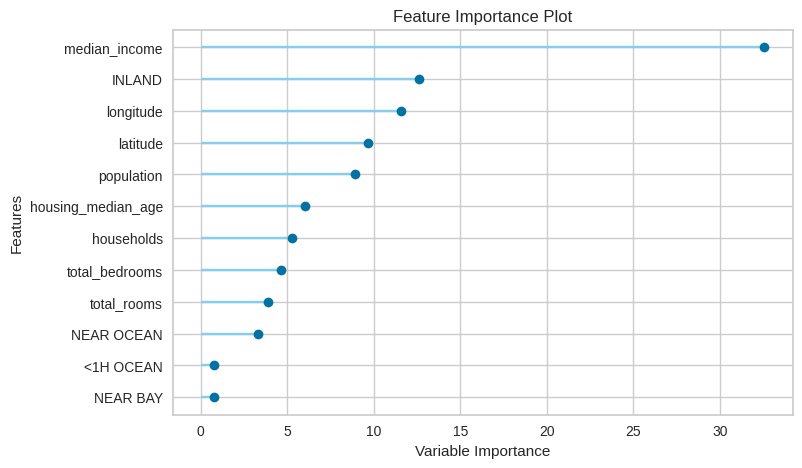

In [ ]:
s.evaluate_model(best)

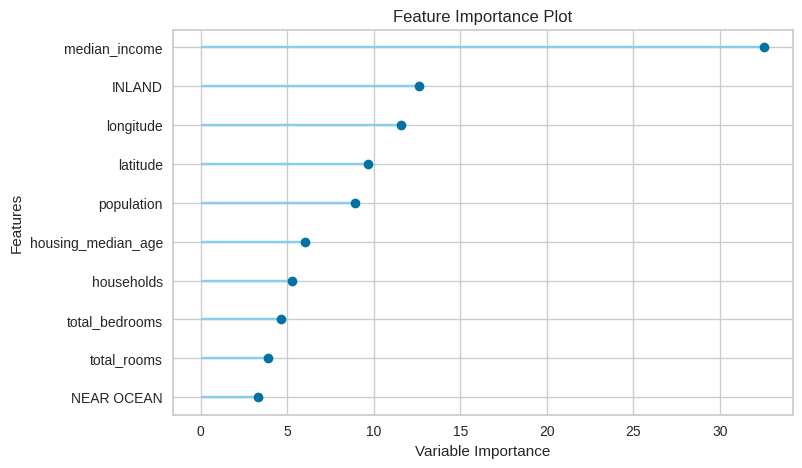

In [ ]:
s.plot_model(best, plot = 'feature')